# Abstract

- Census is the official head-count, collection, and recording of individual respondents’ information on demographic
features that make up the population of a country. This is usually aimed at providing a direction on what resources
or infrastructural developments a country, its states, or provinces would embark upon to benefit her people using
statistics from data provided by each person. Every stable government carries out a population census at least once
every decade. The mode is usually house to house with census officials collecting information in the form of 
a questionnaire. This form of exercise commonly runs from several days to weeks to cover the entire population 
of the country. Using the information provided from the census can be tedious as such large raw data is prone to 
deliberate misinformation, typographic, or human errors while filling forms or during data entry. 
- This Census Project Report of a moderately sized town between two cities details the different stages after 
data collection; from cleaning to the recommendation. 

- The goal of this project is to suggest developments on unused land and recommend investments in future services.

# Introduction

- We are given raw data from the census of a moderately sized town with a headcount of 9979. 
 
- This report gives an account of the steps and techniques used in the different stages. The raw census data was 
first cleaned to get rid of data errors, missing and inconsistent records.

In [1]:
pip install -U pandas-profiling

Note: you may need to restart the kernel to use updated packages.


- Import pandas and numpy; 
- Create a dataframe to read the csv file

In [2]:
import pandas as pd
import numpy as np
#Open the csv file in a dataFrame
census_data = pd.read_csv('census_09_new.csv')

- I named the dataframe "census_data"

In [3]:
census_data

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,ONE,Bastille Plains,Elizabeth,Marshall,39,Head,Married,Female,Further education lecturer,None,Methodist
1,1,Bastille Plains,Glenn,Marshall,46,Husband,Married,Male,Physiotherapist,None,Methodist
2,1,Bastille Plains,George,Marshall,9,Son,NaN,Male,Student,None,NaN
3,2,Bastille Plains,Joanne,Wilson,35,Head,Single,Female,Games developer,None,Christian
4,2,Bastille Plains,Hugh,Wilson,10,Son,NaN,Male,Student,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9974,1,Stephenson Ranch,Josh,Hussain,23,None,Single,Male,Special effects artist,None,Christian
9975,1,Stephenson Ranch,Raymond,Baker,40,None,Single,Male,Restaurant manager,None,None
9976,1,Stephenson Ranch,Shaun,Stanley,39,None,Single,Male,Market researcher,None,None
9977,1,Stephenson Ranch,Katie,Douglas,44,None,Single,Female,Homeopath,None,None


- The dataframe has 9979 rows (individual records) and 11 columns(variables)

In [4]:
print(type(census_data))

<class 'pandas.core.frame.DataFrame'>


In [5]:
for c in census_data.columns:
    print(c)

House Number
Street
First Name
Surname
Age
Relationship to Head of House
Marital Status
Gender
Occupation
Infirmity
Religion


- Above are the list of columns or variables 

In [6]:
census_data.isnull().sum()

House Number                        4
Street                              0
First Name                          1
Surname                             0
Age                                 0
Relationship to Head of House       0
Marital Status                   2454
Gender                              0
Occupation                          0
Infirmity                           0
Religion                         2497
dtype: int64

- We observe from the above that 4 columns (House number, First Name, Marital Status and Religion) have missing values

# Exploration of raw data


In [7]:
census_data.nunique()

House Number                      238
Street                            105
First Name                        369
Surname                           687
Age                               123
Relationship to Head of House      22
Marital Status                      5
Gender                             13
Occupation                       1128
Infirmity                           8
Religion                           17
dtype: int64

- The nunique method shed more information on our dataset, specifically the different types of each variable.
We observe from the above that there are 1128 different Occupation types. These will be explored further in the 
data cleaning stage. 

In [8]:
#Importing the function
from pandas_profiling import ProfileReport
#Generate the report. We would use the mpg dataset as sample, 
#title parameter for naming our report, and explorative parameter set to True for Deeper exploration.
profile = ProfileReport(census_data, title='census_data Pandas Profiling Report', explorative = True)

In [9]:
#profile

In [10]:
# Let us explore the data to discover missing or incorrect details
unique_firstname = census_data['First Name'].unique()
unique_age = census_data['Age'].unique()
unique_religion = census_data['Religion'].unique()
unique_Maritalstatus = census_data['Marital Status'].unique()
unique_Housenumber = census_data['House Number'].unique()
unique_gender = census_data['Gender'].unique()
unique_infirmity = census_data['Infirmity'].unique()
unique_occupation = census_data['Occupation'].unique()


In [11]:
print(unique_firstname) #nan value 

['Elizabeth' 'Glenn' 'George' 'Joanne' 'Hugh' 'Janice' 'Steven' 'Michael'
 'Jasmine' 'Scott' 'Kerry' 'Ruth' 'Vanessa' 'Michelle' 'Marie' 'Dale'
 'Robin' 'Brenda' 'Joe' 'Duncan' 'Emily' 'Nicholas' 'Rachael' 'Rebecca'
 'Lee' 'Maurice' 'Joel' 'Zoe' 'Leonard' 'Joanna' 'Leon' 'Sheila' 'Tom'
 'Guy' 'Martyn' 'Natasha' 'Diane' 'Frederick' 'Alex' 'Phillip' 'Stacey'
 'Lynda' 'Josh' 'Raymond' 'Russell' 'Suzanne' 'Stephen' 'Paul' 'Iain'
 'Lucy' 'Bernard' 'Sara' 'Carole' 'Julia' 'Charlene' 'Reece' 'Patrick'
 'Pamela' 'Bryan' 'Megan' 'Jay' 'Conor' 'Margaret' 'Sally' 'Jeffrey'
 'Leanne' 'Ashley' 'Diana' 'Catherine' 'Andrea' 'Julian' 'Yvonne' 'Elliot'
 'Roger' 'Sophie' 'Christian' 'Henry' 'Mohamed' 'Gail' 'Tracey' 'Georgia'
 'Albert' 'Frances' 'Mitchell' 'Victor' 'Judith' 'Rosie' 'Tina' 'William'
 'Kyle' 'Ashleigh' 'Vincent' 'Annette' 'Roy' 'Donald' 'Paige' 'Garry'
 'Jade' 'Nigel' 'Leah' 'Kate' 'Katie' 'Brandon' 'Derek' 'Shane' 'Jonathan'
 'Elaine' 'Lindsey' 'Jemma' 'Wayne' 'Beverley' 'Josephine' 'Jus

- Above are 238 different first names which includes a "nan" value and 3 abbreviated.
The nan value will be investigated and replaced.

In [12]:
print(unique_age) 

['39' '46' '9' '35' '10' '7' '53' '61' '31' '79' '20' '17' '27' '28' '38'
 '5' '52' '26' '4' '47' '43' '66' '23' '19' '14' '71' '41' '36' '22' '3'
 '12' '8' '48' '44' '77' '49' '56' '62' '64' '25' '65' '34' '30' '29' '40'
 '6' '42' '51' '11' '21' '50' '32' '67' '70' '54' '57' '72' '16' '13' '59'
 '15' '45' 'Seven' '74' '55' '63' '60' '37' '69' '78' '75' '73' '24' '81'
 '58' '18' '68' '2' '80' '84' '86' '82' '1' '33' '0' '76' '83' '90' '87'
 '85' '98' '88' '2.1' '92' '93' '103' '100' '89' '91' '104' '102' '101'
 '105' '107' '94' '99' '63.7497341' '94.94596072' '97' '66.55922257'
 '67.55922257' '49.41583557' '58.30101378' '62.30101378' '275' '0.5'
 '71.47624973' '-1' '91.12782192' '67.10008329' '6.2' 'ONE' '3.3']


- These are the different ages of the individuals captured in the census.
some of the ages were recorded in decimal numbers,negative number,an individual recorded as 275 years old,
others in words, all in string. I will investigate the inconsistencies and amend during cleaning.

In [13]:
print(unique_religion) 

['Methodist' nan 'Christian' 'Catholic' 'None' 'Muslim' 'Sikh' 'Jewish'
 'Orthodoxy' ' ' 'Baptist' 'METHO-DIST' 'Housekeeper' 'Hindu' 'Private'
 'Agnostic' 'CATHOLIC' 'na']


- Obviously nan,na, private, and housekeeper recorded as religions are errors.
In Addition, METHO-DIST, Methodist, Catholic, CATHOLIC, and Baptist should clearly be recorded as 'Christian'

In [14]:
print(unique_Maritalstatus) 

['Married' nan 'Single' 'Widowed' 'Divorced' ' ']


- We have nan and blank recorded for some individuals under marital status.
These will be investigated and replaced appropriately

In [15]:
print(unique_Housenumber) 

['ONE' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' ' ' '14' '15'
 '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29'
 '30' '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41' '42' '43'
 '44' '45' '46' '47' '48' '49' '50' '51' '52' '53' '54' '55' '56' '57'
 '58' '59' '60' '61' '62' '63' '64' '65' '66' '67' '68' '69' '70' '71'
 '72' '73' '74' '75' '76' '77' '78' '79' '80' '81' '82' '83' '84' '85'
 '86' '87' '88' '89' '90' '91' '92' '93' '94' '95' '96' '97' '98' '99'
 '100' '101' '102' '103' '104' '105' '106' '107' '108' '109' '110' '111'
 '112' '113' '114' '115' '116' '117' '118' '119' '120' '121' '122' '123'
 '124' '125' '126' '127' '128' '129' '130' '131' '132' '133' '134' '135'
 '136' '137' '138' '139' '140' '141' '142' '143' '144' '145' '146' '147'
 '148' '149' '150' '151' '152' '153' '154' '155' '156' '157' '158' '159'
 '160' '161' '162' '163' '164' '165' '166' '167' '168' '169' '170' '171'
 '172' '173' '174' '175' '176' '13' '177' '178' '179' '180' '181

- Here we have some missing house numbers, nan, and 2 house numbers recorded in word.
I intend to identify the individuals in the above inconsistent record and use inference from related individuals
to determine the correct house numbers.

In [16]:
print(unique_gender) 

['Female' 'Male' 'FAMALE' 'MALE' ' ' 'FEMALE' 'F' 'M' 'Fe-male' 'Ma-le'
 'famale' 'male' 'F.']


 - We observe above blank values, incorrect spelling/formats: - FAMALE, famale, FEMALE, Fe-male, Ma-le, male. 
   I plan to simply correct the spellings and letter formats.

In [17]:
print(unique_infirmity) 

['None' 'Physical Disability' 'Blind' ' ' 'Disabled' 'Mental Disability'
 'Deaf' 'Unknown Infection']


- Here we can see a blank infirmity value, and none recorded. I will assume that individuals with blank and 
none record have no infirmity hence i will only change the blank records to "None". 

In [18]:
print(unique_occupation)

['Further education lecturer' 'Physiotherapist' 'Student' ...
 'Retired Tree surgeon' 'Retired Tax inspector'
 'Retired Community arts worker']


- The number of occupations can be considered as excessive with many repitions, I plan to streamline the occupations down
to 5 (Child, Student, Employed, Unemployed and Retired). Some individuals above age 65 were recorded as unemployed, 
student recorded as stu-dent among other inconsistencies. These will be tidied in the cleaning stage.

# Data Cleaning - First Name

In [19]:
#Explore the data for inconsistencies
census_data[census_data['First Name'].isna()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7252,29,Rhodes Freeway,NaN,Leah Harvey,41,Head,Single,Female,Publishing rights manager,None,Methodist


- nan value detected in first name;
I suspect the First name was merged with Surname and will be separated appropriately.

In [20]:
# To separate First name from Surname, replace NaN with Leah

census_data.loc[7252, 'First Name'] = 'Leah'
census_data.loc[7252, 'Surname'] = 'Harvey'

print(census_data.iloc[[7252]])


     House Number          Street First Name Surname Age  \
7252           29  Rhodes Freeway       Leah  Harvey  41   

     Relationship to Head of House Marital Status  Gender  \
7252                          Head         Single  Female   

                     Occupation Infirmity   Religion  
7252  Publishing rights manager      None  Methodist  


In [21]:
census_data[census_data['First Name'].isna()] #checking for NaN values of First Name

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


- nan value cleared after first name (Leah) successfully placed.

In [22]:
# Check cleaned data
census_data['First Name'].unique()

array(['Elizabeth', 'Glenn', 'George', 'Joanne', 'Hugh', 'Janice',
       'Steven', 'Michael', 'Jasmine', 'Scott', 'Kerry', 'Ruth',
       'Vanessa', 'Michelle', 'Marie', 'Dale', 'Robin', 'Brenda', 'Joe',
       'Duncan', 'Emily', 'Nicholas', 'Rachael', 'Rebecca', 'Lee',
       'Maurice', 'Joel', 'Zoe', 'Leonard', 'Joanna', 'Leon', 'Sheila',
       'Tom', 'Guy', 'Martyn', 'Natasha', 'Diane', 'Frederick', 'Alex',
       'Phillip', 'Stacey', 'Lynda', 'Josh', 'Raymond', 'Russell',
       'Suzanne', 'Stephen', 'Paul', 'Iain', 'Lucy', 'Bernard', 'Sara',
       'Carole', 'Julia', 'Charlene', 'Reece', 'Patrick', 'Pamela',
       'Bryan', 'Megan', 'Jay', 'Conor', 'Margaret', 'Sally', 'Jeffrey',
       'Leanne', 'Ashley', 'Diana', 'Catherine', 'Andrea', 'Julian',
       'Yvonne', 'Elliot', 'Roger', 'Sophie', 'Christian', 'Henry',
       'Mohamed', 'Gail', 'Tracey', 'Georgia', 'Albert', 'Frances',
       'Mitchell', 'Victor', 'Judith', 'Rosie', 'Tina', 'William', 'Kyle',
       'Ashleigh', 'Vinc

# Data Cleaning - Age

In [23]:
#Explore the data for inconsistencies
census_data['Age'].unique()

array(['39', '46', '9', '35', '10', '7', '53', '61', '31', '79', '20',
       '17', '27', '28', '38', '5', '52', '26', '4', '47', '43', '66',
       '23', '19', '14', '71', '41', '36', '22', '3', '12', '8', '48',
       '44', '77', '49', '56', '62', '64', '25', '65', '34', '30', '29',
       '40', '6', '42', '51', '11', '21', '50', '32', '67', '70', '54',
       '57', '72', '16', '13', '59', '15', '45', 'Seven', '74', '55',
       '63', '60', '37', '69', '78', '75', '73', '24', '81', '58', '18',
       '68', '2', '80', '84', '86', '82', '1', '33', '0', '76', '83',
       '90', '87', '85', '98', '88', '2.1', '92', '93', '103', '100',
       '89', '91', '104', '102', '101', '105', '107', '94', '99',
       '63.7497341', '94.94596072', '97', '66.55922257', '67.55922257',
       '49.41583557', '58.30101378', '62.30101378', '275', '0.5',
       '71.47624973', '-1', '91.12782192', '67.10008329', '6.2', 'ONE',
       '3.3'], dtype=object)

- Age 275 and -1 are obviously wrong data, most likely a typographical error and should be replaced with something else.
- A second look at the ages in decimals revealed 0.5,3.3,2.1 and 6.2 were the only ones in 1 decimal place.


- For 275, a closer look reveals the respondent is husband to head of house (Age 24), I assume respondent is age 27

In [24]:

# To fetch details of the identified respondent with incorrect age and spouse for inference
print(census_data.iloc[[7231]])
print(census_data.iloc[[7230]])


# To fetch details of the identified respondents with incorrect age
print(census_data.iloc[[1966]])
print(census_data.iloc[[8894]])
print(census_data.iloc[[9808]])


     House Number          Street First Name Surname  Age  \
7231           23  Rhodes Freeway      Barry  Murphy  275   

     Relationship to Head of House Marital Status Gender  \
7231                       Husband        Married   Male   

                     Occupation Infirmity Religion  
7231  Health and safety adviser      None     None  
     House Number          Street First Name Surname Age  \
7230           23  Rhodes Freeway       Jane  Murphy  24   

     Relationship to Head of House Marital Status  Gender        Occupation  \
7230                          Head        Married  Female  Technical brewer   

     Infirmity Religion  
7230      None     None  
     House Number          Street First Name  Surname  Age  \
1966           61  Mercybank Road     Amelia  Wheeler  2.1   

     Relationship to Head of House Marital Status  Gender          Occupation  \
1966                          Head         Single  FEMALE  University Student   

     Infirmity   Religion  
19

- Upon investigating, respondents with ages 2.1(a university student) and 3.3 (unemployed) were both head of house 
while 6.2 (a geologist) a lodger, evidencing typo error.
- Based on the above, I will carry out age corrections as follows:

In [25]:
# Replace age recorded as 275 to 27
census_data['Age'] = census_data['Age'].replace('275', 27)

# Replace age recorded as 2.1 to 21
census_data['Age'] = census_data['Age'].replace('2.1', 21)


# Replace age recorded as 3.3 to 33
census_data['Age'] = census_data['Age'].replace('3.3', 33)

# Replace age recorded as 6.2 to 62
census_data['Age'] = census_data['Age'].replace('6.2', 62)

# Replace age recorded as 0.5 to 5
census_data['Age'] = census_data['Age'].replace('0.5', 5)

# Replace age recorded as -1 to 1
census_data['Age'] = census_data['Age'].replace('-1', 1)

# Replace ages recorded in words to numbers
census_data['Age'] = census_data['Age'].replace('ONE', 1)
census_data['Age'] = census_data['Age'].replace('Seven', 7)


In [26]:
#check for blank or missing data
census_data.loc[census_data['Age'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


- No missing value

In [27]:
# Cast all Age entries to integer
census_data['Age'] = [float(a) for a in census_data['Age']]
census_data['Age'] = [int(a) for a in census_data['Age']]

- I converted all age values in float to integer

In [28]:
# check cleaned data
census_data['Age'].unique()

array([ 39,  46,   9,  35,  10,   7,  53,  61,  31,  79,  20,  17,  27,
        28,  38,   5,  52,  26,   4,  47,  43,  66,  23,  19,  14,  71,
        41,  36,  22,   3,  12,   8,  48,  44,  77,  49,  56,  62,  64,
        25,  65,  34,  30,  29,  40,   6,  42,  51,  11,  21,  50,  32,
        67,  70,  54,  57,  72,  16,  13,  59,  15,  45,  74,  55,  63,
        60,  37,  69,  78,  75,  73,  24,  81,  58,  18,  68,   2,  80,
        84,  86,  82,   1,  33,   0,  76,  83,  90,  87,  85,  98,  88,
        92,  93, 103, 100,  89,  91, 104, 102, 101, 105, 107,  94,  99,
        97], dtype=int64)

- All values under the age variable now looks clean

In [29]:
# 15 year old student recorded as married with a child, listed as head of house
# wife is over 18 - illegal relationship

print(census_data.iloc[[5356]])
print(census_data.iloc[[5357]])
print(census_data.iloc[[5358]])

     House Number         Street First Name     Surname  Age  \
5356           28  Reindeer Road     Dennis  O'Sullivan   15   

     Relationship to Head of House Marital Status Gender Occupation Infirmity  \
5356                          Head        Married   Male    Student      None   

     Religion  
5356      NaN  
     House Number         Street First Name     Surname  Age  \
5357           28  Reindeer Road    Georgia  O'Sullivan   19   

     Relationship to Head of House Marital Status  Gender          Occupation  \
5357                          Wife        Married  Female  University Student   

     Infirmity Religion  
5357      None      NaN  
     House Number         Street First Name     Surname  Age  \
5358           28  Reindeer Road      Kelly  O'Sullivan    2   

     Relationship to Head of House Marital Status  Gender Occupation  \
5358                      Daughter            NaN  Female      Child   

     Infirmity Religion  
5358      None      NaN  


- Investigation revealed a 15 year old student recorded as married with a child, listed as head of house
 and wife is over 18 years old. This is an illegal relationship.

- Following the above discovery, i will drop the 3 rows containing information of 1 household.

In [30]:
# Entire household should be expunged
#census_data.drop
census_data.drop(labels=[5356,5357,5358], inplace=True)

# Data Cleaning - Marital Status

In [31]:
#Explore the data for inconsistencies
census_data['Marital Status'].unique()

array(['Married', nan, 'Single', 'Widowed', 'Divorced', ' '], dtype=object)

In [32]:
# nan and missing value ('') seen in Marital status

In [33]:
census_data[census_data['Marital Status'].isna()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2,1,Bastille Plains,George,Marshall,9,Son,NaN,Male,Student,None,NaN
4,2,Bastille Plains,Hugh,Wilson,10,Son,NaN,Male,Student,None,NaN
5,2,Bastille Plains,Janice,Wilson,9,Daughter,NaN,Female,Student,None,NaN
6,2,Bastille Plains,Steven,Wilson,9,Son,NaN,Male,Student,None,NaN
7,2,Bastille Plains,Michael,Wilson,7,Son,NaN,Male,Student,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9949,1,Holden Keep,Shaun,Ferguson,3,Son,NaN,Male,Child,None,NaN
9950,1,Holden Keep,Danny,Young-Ferguson,2,Son,NaN,Male,Child,Deaf,NaN
9951,1,Holden Keep,Christine,Young-Ferguson,0,Daughter,NaN,Female,Child,None,NaN
9959,1,Kraken Farmhouse,Dominic,Spencer-John,16,Son,NaN,Male,Student,None,NaN


- The list of individuals with NaN Marital status were noticed to be minors and sons or daughters of the Head of house.
- They are all below 18 years old, live with parents hence can be classed as 'Single'.

In [34]:
 #First we change NaN values to 'None'
census_data['Marital Status'] = census_data['Marital Status'].replace(np.nan,'None')


In [35]:
#check for nan correction
census_data[census_data['Marital Status'].isna()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [36]:
#Get the list of 'None' Marital Status and age 17 below
census_data.loc[(census_data["Age"]<=17) & (census_data["Marital Status"]=="None")]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2,1,Bastille Plains,George,Marshall,9,Son,None,Male,Student,None,NaN
4,2,Bastille Plains,Hugh,Wilson,10,Son,None,Male,Student,None,NaN
5,2,Bastille Plains,Janice,Wilson,9,Daughter,None,Female,Student,None,NaN
6,2,Bastille Plains,Steven,Wilson,9,Son,None,Male,Student,None,NaN
7,2,Bastille Plains,Michael,Wilson,7,Son,None,Male,Student,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9949,1,Holden Keep,Shaun,Ferguson,3,Son,None,Male,Child,None,NaN
9950,1,Holden Keep,Danny,Young-Ferguson,2,Son,None,Male,Child,Deaf,NaN
9951,1,Holden Keep,Christine,Young-Ferguson,0,Daughter,None,Female,Child,None,NaN
9959,1,Kraken Farmhouse,Dominic,Spencer-John,16,Son,None,Male,Student,None,NaN


In [37]:
# We convert all the marital status for children age 17 and below to single
census_data['Marital Status'] = census_data['Marital Status'].replace('None','Single')

In [38]:
#check after cleaning
census_data.loc[census_data['Marital Status'] == '']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [39]:
# Three individuals aged 18 were seen to have been recorded as widowed (Outlier)

print(census_data.iloc[[1219]])
print(census_data.iloc[[2436]])
print(census_data.iloc[[5961]])


     House Number          Street First Name Surname  Age  \
1219          106  Paladin Street     Cheryl  Thomas   18   

     Relationship to Head of House Marital Status  Gender Occupation  \
1219                      Daughter        Widowed  Female    Student   

     Infirmity Religion  
1219      None     None  
     House Number       Street First Name  Surname  Age  \
2436           28  Jones Wells      Harry  Roberts   18   

     Relationship to Head of House Marital Status Gender Occupation Infirmity  \
2436                          Head        Widowed   Male    Student      None   

     Religion  
2436      NaN  
     House Number         Street First Name  Surname  Age  \
5964          190  Reindeer Road     Bethan  Johnson   18   

     Relationship to Head of House Marital Status  Gender Occupation  \
5964                      Daughter        Widowed  Female    Student   

     Infirmity Religion  
5964      None     None  


- Three individuals aged 18 were seen to have been recorded as widowed (Outlier)
- I will change these records from widowed to single


In [40]:
#change the marital status for the above to single
census_data.loc[1219, 'Marital Status'] = 'Single'
census_data.loc[2436, 'Marital Status'] = 'Single'
census_data.loc[5964, 'Marital Status'] = 'Single'


In [41]:
#Check corrected data
print(census_data.iloc[[1219]])
print(census_data.iloc[[2436]])
print(census_data.iloc[[5961]])

     House Number          Street First Name Surname  Age  \
1219          106  Paladin Street     Cheryl  Thomas   18   

     Relationship to Head of House Marital Status  Gender Occupation  \
1219                      Daughter         Single  Female    Student   

     Infirmity Religion  
1219      None     None  
     House Number       Street First Name  Surname  Age  \
2436           28  Jones Wells      Harry  Roberts   18   

     Relationship to Head of House Marital Status Gender Occupation Infirmity  \
2436                          Head         Single   Male    Student      None   

     Religion  
2436      NaN  
     House Number         Street First Name  Surname  Age  \
5964          190  Reindeer Road     Bethan  Johnson   18   

     Relationship to Head of House Marital Status  Gender Occupation  \
5964                      Daughter         Single  Female    Student   

     Infirmity Religion  
5964      None     None  


In [42]:
#Null marital status identified
print(census_data.iloc[[715]])

    House Number          Street First Name Surname  Age  \
715           41  Mermaid Plains  Catherine   Price   36   

    Relationship to Head of House Marital Status  Gender  \
715                      Daughter                 Female   

               Occupation Infirmity Religion  
715  Community pharmacist      None     None  


In [43]:
# To replace the miss in marital status
#This was done by making inference from the household

census_data.loc[714:717]


,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
714,41,Mermaid Plains,Naomi,Price,67,Head,Widowed,Female,"Engineer, energy",None,None
715,41,Mermaid Plains,Catherine,Price,36,Daughter,,Female,Community pharmacist,None,None
716,41,Mermaid Plains,Carolyn,Price,31,Daughter,Single,Female,Artist,None,None
717,41,Mermaid Plains,Clare,Price,28,Daughter,Single,Female,"Biochemist, clinical",None,None


- Having identified record of Null marital status, Individual was observed from the above to live with widowed mother
and siblings who are also single.
- I will change from "" to Single.

In [44]:
census_data.loc[715, 'Marital Status'] = 'Single'

In [45]:
census_data[census_data['Marital Status'].isna()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [46]:
census_data['Marital Status'].unique()

array(['Married', 'Single', 'Widowed', 'Divorced'], dtype=object)

In [47]:
print(census_data['Marital Status'].value_counts() )

Single      5786
Married     2808
Divorced     970
Widowed      412
Name: Marital Status, dtype: int64


- A cleaned Marital Status has been achieved above

# Data Cleaning - Gender

In [48]:
#Explore data for incorrect/inconsistent records
census_data['Gender'].unique()

array(['Female', 'Male', 'FAMALE', 'MALE', ' ', 'FEMALE', 'F', 'M',
       'Fe-male', 'Ma-le', 'famale', 'male', 'F.'], dtype=object)

- Incorrect gender spellings i.e FAMALE,Fe-male, Ma-le; abbreviations and missing value found in gender.
- These will be replaced below accordingly

In [49]:
#Replace all incorrect gender data as appropriate
census_data['Gender'] = census_data['Gender'].replace('FAMALE','Female')
census_data['Gender'] = census_data['Gender'].replace('FEMALE','Female')
census_data['Gender'] = census_data['Gender'].replace('F','Female')
census_data['Gender'] = census_data['Gender'].replace('Fe-male','Female')
census_data['Gender'] = census_data['Gender'].replace('famale','Female')
census_data['Gender'] = census_data['Gender'].replace('F.','Female')
census_data['Gender'] = census_data['Gender'].replace(' ','Female')
census_data['Gender'] = census_data['Gender'].replace('MALE','Male')
census_data['Gender'] = census_data['Gender'].replace('M','Male')
census_data['Gender'] = census_data['Gender'].replace('Ma-le','Male')
census_data['Gender'] = census_data['Gender'].replace('male','Male')

In [50]:
#Check cleaned data
census_data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

- Cleaned gender variable has been achieved as shown above.

# Data Cleaning - Religion

In [51]:
#Explore data to ascertain only correct and real religions or 'None'
census_data['Religion'].unique()

array(['Methodist', nan, 'Christian', 'Catholic', 'None', 'Muslim',
       'Sikh', 'Jewish', 'Orthodoxy', ' ', 'Baptist', 'METHO-DIST',
       'Housekeeper', 'Hindu', 'Private', 'Agnostic', 'CATHOLIC', 'na'],
      dtype=object)

In [52]:
''' Non religions (Housekeeper, private),nan,na and blank value found in Religion. Mehodist, Catholic,
Orthodoxy,Baptist,METHO-DIST (incorrectly spelt for Methodist), and CATHOLIC are all Christian denominations.
we shall assume the rest of them to have no religion, hence change to None'''

census_data['Religion'] = census_data['Religion'].replace('Private','None')
census_data['Religion'] = census_data['Religion'].replace(' ','None')
census_data['Religion'] = census_data['Religion'].replace('na','None')
census_data['Religion'] = census_data['Religion'].replace('Housekeeper','None')
census_data['Religion'] = census_data['Religion'].replace('METHO-DIST','Christian')
census_data['Religion'] = census_data['Religion'].replace('Methodist','Christian')
census_data['Religion'] = census_data['Religion'].replace('Catholic','Christian')
census_data['Religion'] = census_data['Religion'].replace('Orthodoxy','Christian')
census_data['Religion'] = census_data['Religion'].replace('Baptist','Christian')
census_data['Religion'] = census_data['Religion'].replace('CATHOLIC','Christian')
census_data.replace(np.nan,'None', inplace=True)


In [53]:
#Check the cleaned data
census_data['Religion'].unique()

array(['Christian', 'None', 'Muslim', 'Sikh', 'Jewish', 'Hindu',
       'Agnostic'], dtype=object)

In [54]:
print(census_data['Religion'].value_counts() )

None         5889
Christian    3880
Muslim        106
Sikh           62
Jewish         37
Hindu           1
Agnostic        1
Name: Religion, dtype: int64


- Non religions (Housekeeper, private), nan, na and blank value found in Religion. Mehodist, Catholic,
Orthodoxy, Baptist, METHO-DIST (incorrectly spelt for Methodist), and CATHOLIC are all Christian denominations.
I assumed the rest of them to have no religion, hence changed to "None".

# Data Cleaning - Relationship to Head of House

In [55]:
#Explore the data for inconsistencies
census_data['Relationship to Head of House'].unique() 

array(['Head', 'Husband', 'Son', 'Daughter', 'Granddaughter', 'None',
       'Step-Daughter', 'Step-Son', 'Wife', 'Grandson', 'Partner',
       'Lodger', 'Sibling', 'Adopted Daughter', 'Cousin', 'Neice',
       'Nephew', 'Adopted Son', 'Visitor', 'Son-in-law',
       'Adopted Grandson', 'Daughter-in-law'], dtype=object)

- Data looks good, requires no action.

# Data Cleaning - Infirmity

In [56]:
#Explore data for inconsistencies
census_data['Infirmity'].unique()

array(['None', 'Physical Disability', 'Blind', ' ', 'Disabled',
       'Mental Disability', 'Deaf', 'Unknown Infection'], dtype=object)

- Missing values found in infirmity, this will be assumed as "None".

In [57]:
# Missing values found in infirmity, this will be assumed as None

census_data['Infirmity'] = census_data['Infirmity'].replace(' ','None')


In [58]:
#Check cleaned data
census_data['Infirmity'].unique()

array(['None', 'Physical Disability', 'Blind', 'Disabled',
       'Mental Disability', 'Deaf', 'Unknown Infection'], dtype=object)

In [59]:
print(census_data['Infirmity'].value_counts() )

None                   9910
Disabled                 15
Physical Disability      14
Blind                    12
Mental Disability         9
Unknown Infection         8
Deaf                      8
Name: Infirmity, dtype: int64


# Data Cleaning - Occupation

In [60]:
#Explore the data for inconsistencies
census_data['Occupation'].unique()

array(['Further education lecturer', 'Physiotherapist', 'Student', ...,
       'Retired Tree surgeon', 'Retired Tax inspector',
       'Retired Community arts worker'], dtype=object)

- Here, there are over 1000 different occupations. To aid our analysis, I plan to narrow down the number 
of occupations to as few as 5.

In [61]:
#check for nan values
census_data[census_data['Occupation'].isna()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [62]:
#check for blank values
census_data.loc[census_data['Occupation'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
918,11,Paladin Street,Natalie,Rowe,64,Wife,Married,Female,,None,None
1157,87,Paladin Street,Joanne,Williamson-Harding,25,Partner,Single,Female,,None,None
5644,106,Reindeer Road,Bernard,Johnson,33,Son,Single,Male,,None,Christian
5827,156,Reindeer Road,Rachael,Wallace,38,Head,Married,Female,,None,Christian
9642,34,Brown Manors,Sandra,Edwards,7,Daughter,Single,Female,,None,None


In [63]:
print(census_data.iloc[[918]])
print(census_data.iloc[[1157]])
print(census_data.iloc[[5641]])
print(census_data.iloc[[5824]])
print(census_data.iloc[[9639]])


    House Number          Street First Name Surname  Age  \
918           11  Paladin Street    Natalie    Rowe   64   

    Relationship to Head of House Marital Status  Gender Occupation Infirmity  \
918                          Wife        Married  Female                 None   

    Religion  
918     None  
     House Number          Street First Name             Surname  Age  \
1157           87  Paladin Street     Joanne  Williamson-Harding   25   

     Relationship to Head of House Marital Status  Gender Occupation  \
1157                       Partner         Single  Female              

     Infirmity Religion  
1157      None     None  
     House Number         Street First Name  Surname  Age  \
5644          106  Reindeer Road    Bernard  Johnson   33   

     Relationship to Head of House Marital Status Gender Occupation Infirmity  \
5644                           Son         Single   Male                 None   

       Religion  
5644  Christian  
     House Number   

In [64]:
#Individuals with blank occupations will be corrected based on the commonest occupation of their age group
census_data.loc[918, 'Occupation'] = 'Unemployed'
census_data.loc[1157, 'Occupation'] = 'University Student'
census_data.loc[5644, 'Occupation'] = 'Unemployed'
census_data.loc[5827, 'Occupation'] = 'Unemployed'
census_data.loc[9642, 'Occupation'] = 'Child'


In [65]:
#check after correction
census_data.loc[census_data['Occupation'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [66]:
# Change occupation listed as 'stu-dent' to student
census_data['Occupation'] = census_data['Occupation'].replace('Stu-dent', 'Student')


In [67]:
# Get details of individuals above age 65 recorded as unemployed

census_data.loc[(census_data["Age"] >65) & (census_data["Occupation"]=="Unemployed")]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
113,30,Carr Parkways,Jade,Jones,67,Head,Married,Female,Unemployed,None,Christian
162,49,Carr Parkways,Chloe,Lowe,69,Head,Divorced,Female,Unemployed,None,None
342,114,Carr Parkways,Yvonne,Richards,79,Head,Widowed,Female,Unemployed,None,None
348,115,Carr Parkways,Julie,Chapman,70,Head,Widowed,Female,Unemployed,None,Christian
470,163,Carr Parkways,Emily,Donnelly,68,Head,Widowed,Female,Unemployed,None,None
745,49,Mermaid Plains,Sophie,Lee,68,Head,Married,Female,Unemployed,None,None
800,7,Shaw Green,Carolyn,Carroll,74,Head,Divorced,Female,Unemployed,None,None
994,37,Paladin Street,Rebecca,Stewart,76,Wife,Married,Female,Unemployed,None,None
1002,39,Paladin Street,Denise,Rees,87,Wife,Married,Female,Unemployed,None,Christian
1179,95,Paladin Street,Natalie,Phillips,81,Head,Single,Female,Unemployed,None,None


- Above shows records of individuals above age 65 recorded as unemployed. I have decided to change these to "Retired" below:

In [68]:
# Change record from 'Unemployed' to 'Retired' for individuals over 65

census_data.loc[[113,162,342,348,470,745,800,994,1002,1179,1515,1581,1582,1804,2408,2443,2448],"Occupation"] = 'Retired'
census_data.loc[[2459,2998,3324,3463,4363,4593,4631,4658,4824,4908,4959,5326,5652,5917,6752],"Occupation"] = 'Retired'
census_data.loc[[7188,7417,7462,7583,7879,8070,8262,8343,8387,8641,9010,9300,9490,9623],"Occupation"] = 'Retired'


In [69]:
#All individuals age 68 and above are retired from different occupations
#census_data.loc(census_data["Age"]>=68)
census_data.loc[census_data['Age']>=68]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
11,4,Bastille Plains,Ruth,Lewis,79,Head,Widowed,Female,"Retired Surveyor, insurance",None,Christian
31,1,Carr Parkways,Sheila,Collins,71,Head,Single,Female,Retired Adult guidance worker,None,Christian
50,6,Carr Parkways,Iain,Ford,77,Head,Widowed,Male,Retired Field seismologist,None,Christian
62,10,Carr Parkways,Martyn,Goddard,71,Head,Widowed,Male,"Retired Engineer, petroleum",None,Christian
114,30,Carr Parkways,Nigel,Jones,70,Husband,Married,Male,Retired Warden/ranger,None,None
...,...,...,...,...,...,...,...,...,...,...,...
9879,1,Williams Common,Judith,Lewis,74,Head,Married,Female,Retired Medical laboratory scientific officer,None,None
9880,1,Williams Common,Denis,Lewis,71,Husband,Married,Male,Retired Equities trader,None,None
9902,1,King House,Elizabeth,Davies,77,Head,Married,Female,Retired Catering manager,None,Christian
9903,1,King House,Phillip,Davies,76,Husband,Married,Male,Retired Computer games developer,None,Christian


- Above is a list of 913 individuals retired from various fields. I have decided to simplify these and change to "Retired"

In [70]:
#To narrow down on occupation categories
#We use the function
def occupation_category(occupation):
    if occupation.startswith("Retired"):
        return "Retired"
    elif occupation == "Unemployed":
        return "Unemployed"
    elif "Student" in occupation:
        return "Student"
    elif occupation == "Child":
        return "Child"
    else:
        return "Employed"

In [71]:
census_data["Occupation_Class"] = census_data["Occupation"].apply(lambda x :occupation_category(x))

In [72]:
census_data.groupby(['Occupation_Class']).size().sum()

9976

In [73]:
census_data["Occupation_Class"].unique()

array(['Employed', 'Student', 'Retired', 'Child', 'Unemployed'],
      dtype=object)

In [74]:
print(census_data['Occupation_Class'].value_counts() )

Employed      5289
Student       2603
Retired        926
Child          580
Unemployed     578
Name: Occupation_Class, dtype: int64


- The Occupation Class has been streamlined into 5 as shown above.

# Data Cleaning - House Number

In [75]:
#Explore the data for inconsistencies
census_data['House Number'].unique()

array(['ONE', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', ' ', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33',
       '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44',
       '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55',
       '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66',
       '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77',
       '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88',
       '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99',
       '100', '101', '102', '103', '104', '105', '106', '107', '108',
       '109', '110', '111', '112', '113', '114', '115', '116', '117',
       '118', '119', '120', '121', '122', '123', '124', '125', '126',
       '127', '128', '129', '130', '131', '132', '133', '134', '135',
       '136', '137', '138', '139', '140', '141', '142', '143', '14

- Word numbers (E.g 'ONE'),missing number ('') and nan value detected in House Number. All numbers in str type

In [76]:
census_data.loc[census_data['House Number'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Occupation_Class
71,,Carr Parkways,Leanne,Chambers,47,Head,Married,Female,Airline pilot,None,Christian,Employed
72,,Carr Parkways,Ashley,Chambers,44,Husband,Married,Male,Visual merchandiser,None,Christian,Employed
73,,Carr Parkways,Diana,Chambers,10,Daughter,Single,Female,Student,None,None,Student
74,,Carr Parkways,Catherine,Chambers,3,Daughter,Single,Female,Child,None,None,Child
6225,,Cannontun Drive,Shannon,Baldwin,41,Head,Widowed,Female,Operational investment banker,None,Christian,Employed
6226,,Cannontun Drive,Sean,Baldwin,14,Son,Single,Male,Student,None,None,Student


In [77]:
#Retrieve details of missing House Numbers plus House numbers before and after the missing number

print(census_data.iloc[[70,71,72,73,74,75]])
print(census_data.iloc[[6224,6225,6226,6227]])

   House Number         Street First Name   Surname  Age  \
70           12  Carr Parkways    Jeffrey      Bell    5   
71               Carr Parkways     Leanne  Chambers   47   
72               Carr Parkways     Ashley  Chambers   44   
73               Carr Parkways      Diana  Chambers   10   
74               Carr Parkways  Catherine  Chambers    3   
75           14  Carr Parkways     Andrea     Burns   46   

   Relationship to Head of House Marital Status  Gender           Occupation  \
70                           Son         Single    Male              Student   
71                          Head        Married  Female        Airline pilot   
72                       Husband        Married    Male  Visual merchandiser   
73                      Daughter         Single  Female              Student   
74                      Daughter         Single  Female                Child   
75                          Head        Married  Female     Marine scientist   

   Infirmity   Rel

In [78]:
#Replace missing house number 
#13 is the missing number between 12 and 14 on both Streets
census_data['House Number'] = census_data['House Number'].replace(' ', 13)

In [79]:
# Replace House numbers recorded in words to numbers
census_data['House Number'] = census_data['House Number'].replace('ONE', 1)
census_data['House Number'] = census_data['House Number'].replace('TWENTY', 20)


- The correct details of missing House Numbers were derived from House numbers before and after the missing number.
These have been replaced appropriately above.


In [80]:
#Check for NaN House Numbers
census_data[census_data['House Number'].isna()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Occupation_Class


In [81]:
#Retrieve details of NaN House Numbers plus House number before and after the missing number
print(census_data.iloc[[5702,5703,5704]])
print(census_data.iloc[[8286,8287,8288]])
print(census_data.iloc[[9799,9800,9801]])
print(census_data.iloc[[9808,9809,9810]])


     House Number         Street First Name  Surname  Age  \
5705          123  Reindeer Road       Anne  Doherty   36   
5706          123  Reindeer Road        Sam  Doherty   36   
5707          123  Reindeer Road    Shannon  Doherty   33   

     Relationship to Head of House Marital Status  Gender  \
5705                      Daughter         Single  Female   
5706                           Son       Divorced    Male   
5707                      Daughter         Single  Female   

                 Occupation Infirmity Religion Occupation_Class  
5705           Tree surgeon      None     None         Employed  
5706             Unemployed      None     None       Unemployed  
5707  Private music teacher      None     None         Employed  
     House Number     Street First Name Surname  Age  \
8289           12  Fox Hills      Brian  Watson    1   
8290           13  Fox Hills   Danielle  Miller   34   
8291           13  Fox Hills      David  Miller   37   

     Relationship to 

In [82]:
#inferring from other household members above
#replace missing House Numbers
census_data.loc[5703, 'House Number'] = 123
census_data.loc[8287, 'House Number'] = 12
census_data.loc[9800, 'House Number'] = 2
census_data.loc[9809, 'House Number'] = 7


- Missing house numbers were derived by inferring from other household members above.

In [83]:
#checked cleaned data
census_data[census_data['House Number'].isna()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Occupation_Class


In [84]:
#check the cleaned data
census_data[census_data['House Number'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Occupation_Class


In [85]:
#Cast data type in house number to integer
census_data['House Number'] = [float(b) for b in census_data['House Number']]
census_data['House Number'] = [int(b) for b in census_data['House Number']]

- House numbers in float were converted to integer above.

In [86]:
#Check the cleaned data
census_data['House Number'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [87]:
#Importing the function
from pandas_profiling import ProfileReport
#Generate the report. We would use the mpg dataset as sample, 
#title parameter for naming our report, and explorative parameter set to True for Deeper exploration.
profile = ProfileReport(census_data, title='census_data Pandas Profiling Report', explorative = True)


In [88]:
#profile

In [89]:
#double check for null values in all data
census_data.isnull().any()

House Number                     False
Street                           False
First Name                       False
Surname                          False
Age                              False
Relationship to Head of House    False
Marital Status                   False
Gender                           False
Occupation                       False
Infirmity                        False
Religion                         False
Occupation_Class                 False
dtype: bool

- All null values have been successfully replaced.

In [90]:
#After cleaning, check the new look of our data
census_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9976 entries, 0 to 9978
Data columns (total 12 columns):
House Number                     9976 non-null int64
Street                           9976 non-null object
First Name                       9976 non-null object
Surname                          9976 non-null object
Age                              9976 non-null int64
Relationship to Head of House    9976 non-null object
Marital Status                   9976 non-null object
Gender                           9976 non-null object
Occupation                       9976 non-null object
Infirmity                        9976 non-null object
Religion                         9976 non-null object
Occupation_Class                 9976 non-null object
dtypes: int64(2), object(10)
memory usage: 1.3+ MB


# Visualization

In [91]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [92]:
%matplotlib inline

<AxesSubplot:xlabel='Age', ylabel='Count'>

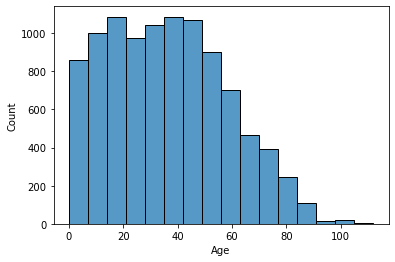

In [93]:
#Age distribution
age_binwidth = (census_data['Age'].max() - census_data['Age'].min())/15
age_binwidth = int(age_binwidth)
sns.histplot(x = census_data['Age'], binwidth =age_binwidth)

- From the plot, we see that majority of the population are between age 20 and 45.

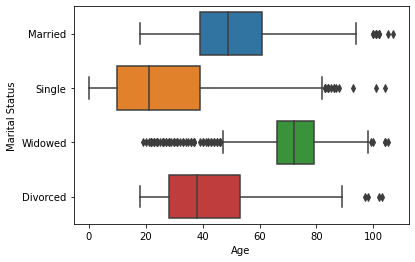

In [94]:
#Age by Marital Status Plot
sns.boxplot(data = census_data, x = 'Age', y = 'Marital Status')
plt.show()

- We can infer from the plot that majority of the popuplation are single while the widowed form a minority.

<AxesSubplot:xlabel='Age', ylabel='Relationship to Head of House'>

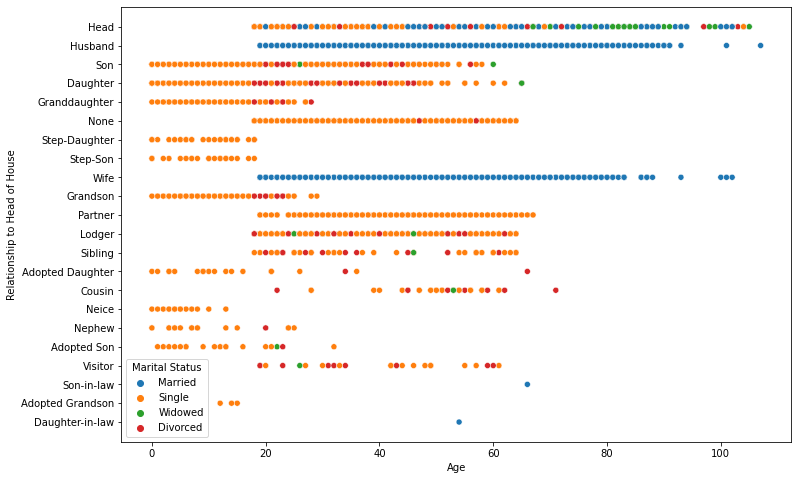

In [95]:
#Relationship to Head of House Vs Age conditioned by Marital Status
plt.figure(figsize = (12,8))
sns.scatterplot(data = census_data, x= 'Age', y = 'Relationship to Head of House', hue = 'Marital Status')

- We can also observe here that "single" people whose relationship to head of house are son/daughter, 
adopted son/daughter, grandson/granddaughter, stepson/stepdaughter, nephew/niece etc account for the largest
part of the population.


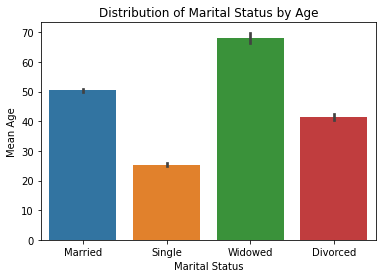

In [96]:
sns.barplot(data = census_data, x = 'Marital Status', y = 'Age')
plt.title('Distribution of Marital Status by Age')
plt.xlabel('Marital Status')
plt.ylabel('Mean Age')
plt.show()

- The above plot reveals that individuals who are widowed are the oldest with a mean age of 69,
while single people in the population have a mean age of 24.  

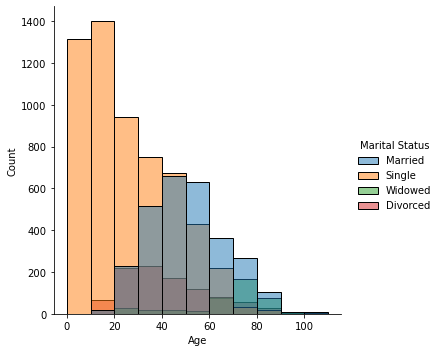

In [97]:
# Age conditioned by marital status distribution plot
sns.displot(census_data, x = 'Age', hue = 'Marital Status', binwidth = 10)

- Single people in the population are observed to be the largest chunk.

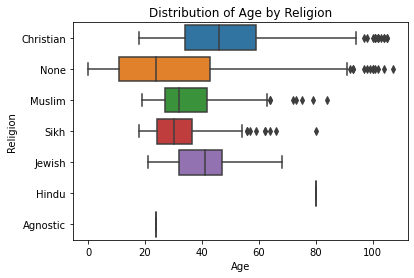

In [98]:
#Age by Religion Plot
sns.boxplot(data = census_data, x = 'Age', y = 'Religion')
plt.title('Distribution of Age by Religion')
plt.show()

- From the plot, it is obvious that the religions Hindu and Agnostic are new or growing judging by the few individuals 
under both.

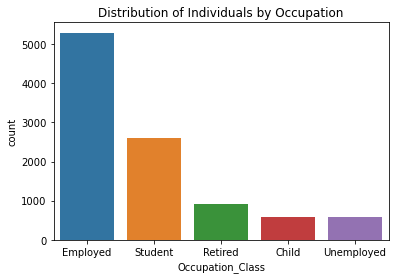

In [100]:
#Distribution of Individuals by Occupation
sns.countplot(x = "Occupation_Class", data = census_data)
plt.title("Distribution of Individuals by Occupation")
plt.show()


- The above plot shows that more than half of the population is employed.

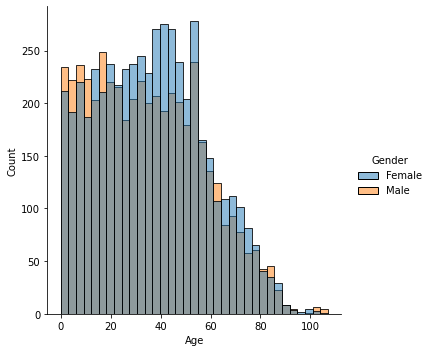

In [101]:
# distribution of age vs Employment conditioned by gender
Unemployed = (census_data["Occupation"]=="Unemployed")
sns.displot(data=census_data, x='Age',hue='Gender')
plt.show()

- Based on the above plot, we seem to have more unemployed females between age 25 and 55.

In [102]:
#Average age of individuals by gender and marital status
meanagemar = census_data.groupby(['Gender','Marital Status']).agg({'Age': ['mean']})
meanagemar.columns = ['Age_mean']

round(meanagemar)

Age_mean
Gender Marital Status          
Female Divorced            44.0
       Married             49.0
       Single              26.0
       Widowed             68.0
Male   Divorced            38.0
       Married             51.0
       Single              24.0
       Widowed             68.0

In [103]:
#To build population age band by gender, we use the function
def Age_gender(p):
    if p > 110:
        return '110+'
    elif p > 104 and p < 110:
        return '105 - 109'
    elif p > 99 and p < 105:
        return '100 - 104'    
    elif p > 94 and p < 100:
        return '95 - 99'
    elif p > 89 and p < 95:
        return '90 - 94'
    elif p > 84 and p < 90:
        return '85 - 89'
    elif p > 79 and p < 85:
        return '80 - 84'
    elif p > 74 and p < 80:
        return '75 - 79'
    elif p > 69 and p < 75:
        return '70 - 74'
    elif p > 64 and p < 70:
        return '65 - 69'
    elif p > 59 and p < 65:
        return '60 - 64'
    elif p > 54 and p < 60:
        return '55 - 59'
    elif p > 49 and p < 55:
        return '50 - 54'
    elif p > 44 and p < 50:
        return '45 - 49'
    elif p > 39 and p < 45:
        return '40 - 44'
    elif p > 34 and p < 40:
        return '35 - 39'
    elif p > 29 and p < 35:
        return '30 - 34'
    elif p > 24 and p < 30:
        return '25 - 29'
    elif p > 19 and p < 25:
        return '20 - 24'
    elif p > 14 and p < 20:
        return '15 - 19'
    elif p > 9 and p < 15:
        return '10 - 14'
    elif p > 4 and p < 10:
        return '5 - 9'
    else:
        if p < 5:
            return '0 - 4'

In [106]:
census_data['Age_col'] = census_data['Age'].apply(lambda p : Age_gender(p))

In [107]:
census_data.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Occupation_Class,Age_col
0,1,Bastille Plains,Elizabeth,Marshall,39,Head,Married,Female,Further education lecturer,None,Christian,Employed,35 - 39
1,1,Bastille Plains,Glenn,Marshall,46,Husband,Married,Male,Physiotherapist,None,Christian,Employed,45 - 49
2,1,Bastille Plains,George,Marshall,9,Son,Single,Male,Student,None,None,Student,5 - 9
3,2,Bastille Plains,Joanne,Wilson,35,Head,Single,Female,Games developer,None,Christian,Employed,35 - 39
4,2,Bastille Plains,Hugh,Wilson,10,Son,Single,Male,Student,None,None,Student,10 - 14


- The age group column named "Age_col" has been added to the dataframe above.
This is to aid in determning the population age band by gender.

In [108]:
census_data.groupby(['Age_col', 'Gender']).size()

Age_col    Gender
0 - 4      Female    277
           Male      302
10 - 14    Female    351
           Male      359
100 - 104  Female      5
           Male       10
105 - 109  Female      1
           Male        2
15 - 19    Female    371
           Male      407
20 - 24    Female    362
           Male      344
25 - 29    Female    393
           Male      321
30 - 34    Female    399
           Male      348
35 - 39    Female    421
           Male      347
40 - 44    Female    451
           Male      344
45 - 49    Female    402
           Male      326
5 - 9      Female    347
           Male      390
50 - 54    Female    346
           Male      286
55 - 59    Female    285
           Male      278
60 - 64    Female    202
           Male      211
65 - 69    Female    176
           Male      148
70 - 74    Female    177
           Male      127
75 - 79    Female    115
           Male       99
80 - 84    Female     70
           Male       78
85 - 89    Female     41
       

In [109]:
census_data.info() #Adding 'Age col' to our cleaned data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9976 entries, 0 to 9978
Data columns (total 13 columns):
House Number                     9976 non-null int64
Street                           9976 non-null object
First Name                       9976 non-null object
Surname                          9976 non-null object
Age                              9976 non-null int64
Relationship to Head of House    9976 non-null object
Marital Status                   9976 non-null object
Gender                           9976 non-null object
Occupation                       9976 non-null object
Infirmity                        9976 non-null object
Religion                         9976 non-null object
Occupation_Class                 9976 non-null object
Age_col                          9976 non-null object
dtypes: int64(2), object(11)
memory usage: 1.4+ MB


In [110]:
census_data['Age_col'].isna().sum()

0

In [111]:
census_data['Age_col'].unique()

array(['35 - 39', '45 - 49', '5 - 9', '10 - 14', '50 - 54', '60 - 64',
       '30 - 34', '75 - 79', '20 - 24', '15 - 19', '25 - 29', '0 - 4',
       '40 - 44', '65 - 69', '70 - 74', '55 - 59', '80 - 84', '85 - 89',
       '90 - 94', '95 - 99', '100 - 104', '105 - 109'], dtype=object)

In [112]:
print(census_data['Age_col'].value_counts() )

40 - 44      795
15 - 19      778
35 - 39      768
30 - 34      747
5 - 9        737
45 - 49      728
25 - 29      714
10 - 14      710
20 - 24      706
50 - 54      632
0 - 4        579
55 - 59      563
60 - 64      413
65 - 69      324
70 - 74      304
75 - 79      214
80 - 84      148
85 - 89       77
90 - 94       16
100 - 104     15
95 - 99        5
105 - 109      3
Name: Age_col, dtype: int64


In [113]:
Census2data = pd.DataFrame({'Age':['0-4','5-9','10-14','15-19','20-24','25-29','30-34','35-39','40-44','45-49',
                                   '50-54','55-59','60-64','65-69','70-74','75-79','80-84','85-89','90-94','95-99','100-104','105-109','110+'],
                           'male':[-302,-390,-359,-408,-344,-321,-348,-347,-344,-326,-286,-278,-211,-148,-127,-99,-78,-36,-10,0,-10,-2,0],
                           'female':[278,347,351,372,362,393,399,421,451,402,346,285,202,176,177,115,70,41,6,5,5,1,0]})
Age_class = ['110+','105-109','100-104','95-99','90-94','85-89','80-84','75-79','70-74','65-69','60-64','55-59','50-54','45-49','40-44','35-39','30-34','25-29','20-24','15-19','10-14','5-9','0-4']

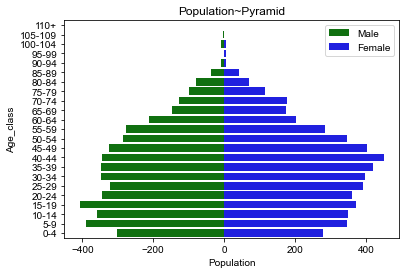

In [114]:
Population_Pyramid = sns.barplot(x = 'male', y = 'Age', data= Census2data, order = Age_class, color= ('green'), label='Male')
Population_Pyramid = sns.barplot(x = 'female', y = 'Age', data= Census2data, order = Age_class, color= ('blue'), label='Female')
Population_Pyramid.legend()

plt.title('Population~Pyramid')
Population_Pyramid.set(xlabel='Population', ylabel= 'Age_class')
sns.set(rc={'figure.figsize':(20,10)})

- The population pyramid above shows the distribution by age and gender.
- It is obvious that there are more females than male respondents.
- We can also see that there are fewer aged individuals in the population particularly from 60 years upwards.

In [115]:
census_data.to_csv('census_data.csv')

In [116]:
census_09 = pd.read_csv('census_data.csv', delimiter=',')
census_09

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Occupation_Class,Age_col
0,0,1,Bastille Plains,Elizabeth,Marshall,39,Head,Married,Female,Further education lecturer,None,Christian,Employed,35 - 39
1,1,1,Bastille Plains,Glenn,Marshall,46,Husband,Married,Male,Physiotherapist,None,Christian,Employed,45 - 49
2,2,1,Bastille Plains,George,Marshall,9,Son,Single,Male,Student,None,None,Student,5 - 9
3,3,2,Bastille Plains,Joanne,Wilson,35,Head,Single,Female,Games developer,None,Christian,Employed,35 - 39
4,4,2,Bastille Plains,Hugh,Wilson,10,Son,Single,Male,Student,None,None,Student,10 - 14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9971,9974,1,Stephenson Ranch,Josh,Hussain,23,None,Single,Male,Special effects artist,None,Christian,Employed,20 - 24
9972,9975,1,Stephenson Ranch,Raymond,Baker,40,None,Single,Male,Restaurant manager,None,None,Employed,40 - 44
9973,9976,1,Stephenson Ranch,Shaun,Stanley,39,None,Single,Male,Market researcher,None,None,Employed,35 - 39
9974,9977,1,Stephenson Ranch,Katie,Douglas,44,None,Single,Female,Homeopath,None,None,Employed,40 - 44


In [117]:
totalpopulation = len(census_09)

In [118]:
totalpopulation

9976

# Crude Birth Rate

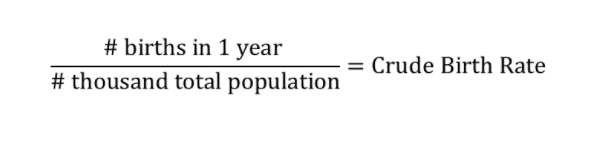

In [119]:
len(census_09[census_09['Age'] == 0]) # a proxy of children born in the census year

89

In [120]:
livebirths = len(census_09[census_09['Age'] == 0])
# cbrate = Crude Birth Rate
cbrate = (livebirths/totalpopulation)*1000
#cbrate
print(f"{cbrate:.1f} births per thousand")

8.9 births per thousand


In [121]:
#To determine current crude birth rate,previous birth rate and change in crude birth rate
#We take children with age 0 as a proxy of children born in the census year
#we take children age 4 (bage4) as born during the last census
#and children age 8 (bage8) as born in the previous census

bage0 = census_09['Age']== 0
bage4 = census_09['Age']== 4
bage8 = census_09['Age']== 8

crudebr = (len(census_09[bage0])/totalpopulation)*1000 

crudebr4year = (len(census_09[bage4])/len(census_09))*1000

print(f"Present Crude Birthrate is : {crudebr:.1f} births per 1000")
print(f"Previous Crude Birthrate was : {crudebr4year:.1f} births per 1000")


print(f"Present CBR Change from Previous is: {crudebr-crudebr4year:.1f} births per 1000")


Present Crude Birthrate is : 8.9 births per 1000
Previous Crude Birthrate was : 13.3 births per 1000
Present CBR Change from Previous is: -4.4 births per 1000


# Crude Death Rate

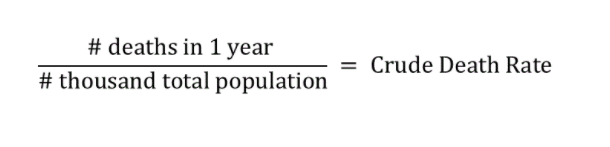

In [122]:
aging_population = census_09[census_09['Age'].between(65,107)].groupby('Age').size().sort_index(ascending=False)
aging_population

Age
107     1
105     2
104     3
103     1
102     4
101     4
100     3
99      1
98      2
97      2
94      3
93      5
92      1
91      3
90      4
89      9
88     10
87     20
86     22
85     16
84     27
83     37
82     34
81     25
80     25
79     40
78     35
77     51
76     37
75     51
74     51
73     62
72     65
71     52
70     74
69     52
68     79
67     62
66     61
65     70
dtype: int64

In [123]:
# shift the ages up one to mimic last year's 'counts' per age

calculated_ages = aging_population.shift(-1)
calculated_ages

Age
107     2.0
105     3.0
104     1.0
103     4.0
102     4.0
101     3.0
100     1.0
99      2.0
98      2.0
97      3.0
94      5.0
93      1.0
92      3.0
91      4.0
90      9.0
89     10.0
88     20.0
87     22.0
86     16.0
85     27.0
84     37.0
83     34.0
82     25.0
81     25.0
80     40.0
79     35.0
78     51.0
77     37.0
76     51.0
75     51.0
74     62.0
73     65.0
72     52.0
71     74.0
70     52.0
69     79.0
68     62.0
67     61.0
66     70.0
65      NaN
dtype: float64

In [124]:
# calculate the difference between our two sets

diff = aging_population - calculated_ages

# change it to a dataframe...

diff = diff.reset_index(name='Count')

# We're only interested in deaths, not emigration!! So we're interested in negative counts only

deaths = diff[diff['Count'] < 0]
deaths

,Age,Count
0,107,-1.0
1,105,-1.0
3,103,-3.0
7,99,-1.0
9,97,-1.0
10,94,-2.0
12,92,-2.0
13,91,-1.0
14,90,-5.0
15,89,-1.0


- This is merely the difference between individual years as a proxy for current year and previous year

In [125]:
death_rate = abs(((deaths['Count']).sum())/totalpopulation)*1000
#death_rate
print(f"{death_rate:.1f} deaths per thousand")

16.8 deaths per thousand


# Crude Growth Rate

In [126]:
#Crude Birth Rate - Crude Death Rate = Crude Growth Rate

print(f"CGR {crudebr - death_rate:.1f}")
print(f"CGR as Percentage {(crudebr-death_rate)/10:.2f}%")  #division by 10 to get percentage

CGR -7.9
CGR as Percentage -0.79%


# Population Change

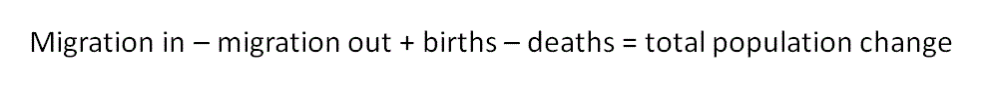

In [127]:
#emigrants (migration out) = divorced female - divorced male
# To get emigrants, group by Marital Status and Gender
print("Groups in Marital Status by Gender:")
Msgen_groups = census_09.groupby(["Marital Status","Gender"])
for group_key, group_value in Msgen_groups:
    Msgen_group = Msgen_groups.get_group(group_key)
    #print("Count of each group:")
    Msgen_grouped = census_09.groupby(["Marital Status", "Gender"]
                                     ).size().reset_index(name="Count")
print(Msgen_grouped)
    #print("")
# reference https://www.delftstack.com/howto/python-pandas/pandas-groupby-two-columns/  

Groups in Marital Status by Gender:
  Marital Status  Gender  Count
0       Divorced  Female    601
1       Divorced    Male    369
2        Married  Female   1412
3        Married    Male   1396
4         Single  Female   2960
5         Single    Male   2826
6        Widowed  Female    230
7        Widowed    Male    182


Number of divorced male = 369
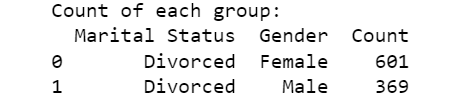


Number_of_emigrants =  divorced_female - divorced_male

In [128]:
Number_of_emigrants = 601 - 369

In [129]:
Number_of_emigrants

232

In [130]:
emigrants_per_thousand = 232/10

In [131]:
emigrants_per_thousand

23.2

In [132]:
#immigrants = number of lodgers + visitors
lodgers = len(census_09[census_09['Relationship to Head of House'] == 'Lodger'])
visitors = len(census_09[census_09['Relationship to Head of House'] == 'Visitor'])

In [133]:
lodgers + visitors

402

In [134]:
# Of the 402 lodgers and visitors, there are university students
# and few other professionals (assumed as 40%) who might be considered constant in the population.

# immigrants = lodgers + visitors - (students and others)
immigrants = 402 - 160
immigrants

242

- Of the 402 lodgers and visitors above, there are university students
 and few other professionals (assumed as 40% = 160) who might be considered constant in the population.


In [135]:
immigrants_per_thousand = 242/10

In [136]:
immigrants_per_thousand

24.2

In [137]:
Total_Population_change = 24.2 - 23.2 + 8.9 - 16.8

In [138]:
print(f"Total Population Change per thousand is: {Total_Population_change:.1f} ")

Total Population Change per thousand is: -6.9 


In [139]:
# to determine occupancy rates

occupancy_count = census_09.groupby(['House Number', 'Street']).size().reset_index(name='Occupancy Count')
occupancy_count

,House Number,Street,Occupancy Count
0,1,Alba Avenue,7
1,1,Allen Rocks,5
2,1,Anvil Tower,2
3,1,Armstrong Drive,2
4,1,Arrows Parkways,3
...,...,...,...
3545,231,Crown Street,1
3546,232,Crown Street,1
3547,233,Crown Street,1
3548,234,Crown Street,1


In [140]:
occupancy_count['Occupancy Count'].value_counts()

1     999
2     802
4     662
3     589
5     314
6     106
7      29
11     11
10      9
12      8
8       8
9       5
14      3
15      2
19      1
20      1
22      1
Name: Occupancy Count, dtype: int64

In [141]:
occupancy_count['Occupancy Count'].describe()

count    3550.000000
mean        2.810141
std         1.818477
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        22.000000
Name: Occupancy Count, dtype: float64

- From the frequency distribution above, we have houses occupied by a range from 1 person to 22 people.
- It also shows a mean occupancy of 2.8

# Commuters

In [142]:
#To determine an estimate number of commuters
#We extract university students, teachers of higher education and other select professionals

commuters = len(census_09[census_09["Occupation"].isin(["Further education lecturer","Physiotherapist","Management consultant","Intelligence analyst",
                                                        "Recruitment consultant","Scientific laboratory technician","Consulting civil engineer",
                                                        "Psychotherapist","Therapist, occupational","University Student",
                                                        "Telecommunications researcher","Toxicologist","Production assistant, television",
                                                        "Engineer, energy","Airline pilot","Marine scientist","Academic librarian",
                                                        "Lecturer, higher education","Architectural technologist","Scientist, water quality",
                                                        "Mining engineer","Petroleum engineer","Media planner","Clinical molecular geneticist",
                                                        "Designer, industrial/product","Medical technical officer","Scientist, research (medical)",
                                                        "Neurosurgeon","Insurance broker","Electrical engineer","Mechanical engineer",
                                                        "Engineer, control and instrumentation","Engineer, structural","Maintenance engineer",
                                                        "Pharmacist, hospital","Immigration officer","Associate Professor","Chartered accountant",
                                                        "Public relations account executive","Clinical scientist, histocompatibility and immunogenetics",
                                                        "Forensic scientist","Chief Operating Officer","Doctor, general practice","Analytical chemist",
                                                        "Chief of Staff","Psychologist, occupational","Chemist, analytical","Biomedical engineer",
                                                        "Scientist, biomedical","Engineer, automotive","Engineer, electronics",
                                                        "Manufacturing systems engineer","Psychotherapist, child","Engineer, communications",
                                                        "Orthoptist","Engineer, drilling","Armed forces training and education officer",
                                                        "Designer, multimedia","Diplomatic Services operational officer","Engineer, civil (consulting)",
                                                        "Broadcast presenter","Aeronautical engineer","Clinical biochemist",
                                                        "Podiatrist","Oceanographer","Air cabin crew","Astronomer","Engineer, communications",
                                                        "Geophysical data processor","Clinical research associate","Engineer, maintenance (IT)",
                                                        "Meteorologist","Brewing technologist","Therapeutic radiographer","Pharmacologist",
                                                        "Accountant, chartered certified","Chemical engineer","Petroleum engineer","Oncologist",
                                                        "Engineering geologist","Network engineer","Ergonomist","Applications developer",
                                                        "Engineer, production","Software engineer","Naval architect","Chief Financial Officer",
                                                        "Surgeon","Broadcast engineer","Designer, television/film set","Professor Emeritus",
                                                        "Producer, television/film/video","Investment banker, operational","Solicitor, Scotland",
                                                        "Geochemist","Dentist","PhD Student","Doctor, hospital","Cytogeneticist",
                                                        "Clinical psychologist","Immunologist","Chartered legal executive (England and Wales)"])])



print("Estimated number of Commuters is:", commuters)

Estimated number of Commuters is: 1492


In [143]:
#percentage of commuters in population 
round(1492*100/9976)

15

# Employment rate

In [144]:
print(census_data['Occupation'].value_counts() )

Student                             1998
University Student                   592
Child                                580
Unemployed                           578
Retired                               46
                                    ... 
Retired Health service manager         1
Retired Prison officer                 1
Retired Hospital doctor                1
Retired Field seismologist             1
Retired Print production planner       1
Name: Occupation, Length: 1127, dtype: int64


In [145]:
# Total_unemployed_16above = Unemployed from value_counts above

Total_unemployed_16above = 578 

print("Total number of unemployed 16 and above is:", Total_unemployed_16above)

Total number of unemployed 16 and above is: 578


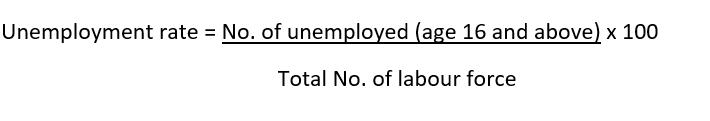

In [146]:
Total_No_of_labourforce = census_data[(census_data["Age"]>=16) & (census_data["Age"]<=65)].count()

In [147]:
Total_No_of_labourforce

House Number                     6779
Street                           6779
First Name                       6779
Surname                          6779
Age                              6779
Relationship to Head of House    6779
Marital Status                   6779
Gender                           6779
Occupation                       6779
Infirmity                        6779
Religion                         6779
Occupation_Class                 6779
Age_col                          6779
dtype: int64

In [148]:
Unemployment_rate = 578*100/6779
round(Unemployment_rate)

9

# Recommendations

- Judging by the high estimated number of commuters, building a train station will be of great benefit 
to a large population especially students and low-income earners while also creating a faster travel option for
people who choose not to drive.
- Having identified the population of the town as affluent and taking into account the high occupancy rate of 
some homes, building low-density houses will enable homes to downsize while also providing more accommodation
for lodgers.

- Given the high unemployment rate, recruitment and training of individuals in the unemployed labor force should
be invested.
- The high number of retired individuals in the population is an indication that the aging group will expand and
ultimately require support and care. The presence of old-age care will likely reduce the death rate therefore
investing in them should be given importance and planned. 
- Spending for schools in the town should be considered shortly as students can be seen to have constant population growth. This will open up more employment and improve retail services in the town, the number of lodgers will increase, bringing more income to house owners.
